In [1]:
import json

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

### TRAIN SET

In [46]:
with open("model/python/train.defects", "r") as f:
    defects = json.load(f)
with open("model/python/train.log_probs", "r") as f:
    log_probs = json.load(f)

In [47]:
defects, log_probs = np.array(defects), np.array(log_probs)

In [48]:
fpr, tpr, thresholds = roc_curve(defects, log_probs)

In [49]:
roc_auc = auc(fpr, tpr)

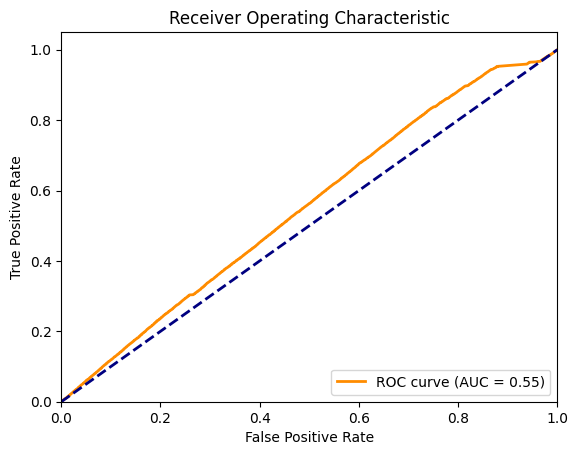

In [50]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [51]:
optimal_threshold = thresholds[0]
best_f1_score = 0

for threshold in thresholds[::1000]:
    y_pred = (log_probs >= threshold).astype(int)
    f1 = f1_score(defects, y_pred)
    
    if f1 > best_f1_score:
        best_f1_score = f1
        optimal_threshold = threshold

In [52]:
optimal_threshold, best_f1_score

(-16.889713287353516, 0.5436158295669413)

In [19]:
optimal_threshold = thresholds[0]
best_accuracy = 0

for threshold in thresholds[::1000]:
    y_pred = (log_probs >= threshold).astype(int)
    acc = accuracy_score(defects, y_pred)
    
    if acc > best_f1_score:
        best_accuracy = acc
        optimal_threshold = threshold

In [20]:
optimal_threshold, best_accuracy

(-10.568926811218262, 0.5447828611354399)

In [53]:
y_pred = (log_probs >= optimal_threshold).astype(int)

In [54]:
precision = precision_score(defects, y_pred)
recall = recall_score(defects, y_pred)
accuracy = accuracy_score(defects, y_pred)
f1 = f1_score(defects, y_pred)

In [55]:
print(f"train precision {precision}")
print(f"train recall {recall}")
print(f"train f1_score {f1}")
print(f"train accuracy {accuracy}")

train precision 0.3804619198816928
train recall 0.9517602319774116
train f1_score 0.5436158295669413
train accuracy 0.4218624836395485


In [24]:
preds = (log_probs >= optimal_threshold).astype(int)
print(f"overall accuracy {defects.sum() / len(preds)}")

overall accuracy 0.36177214442465333


In [25]:
defect_preds = (log_probs[defects] >= optimal_threshold).astype(int)
print(f"accuracy for labeling defects {defect_preds.sum() / len(defect_preds)}")

accuracy for labeling defects 1.0


In [26]:
correct_preds = (log_probs[np.logical_not(defects)] < optimal_threshold).astype(int)
correct_preds.sum() / len(correct_preds)
print(f"accuracy for labeling correct code {correct_preds.sum() / len(correct_preds)}")

accuracy for labeling correct code 0.5914905296138451


### TEST SET

In [56]:
with open("model/python/test_0.defects", "r") as f:
    defects = json.load(f)
with open("model/python/test_0.log_probs", "r") as f:
    log_probs = json.load(f)

In [57]:
defects, log_probs = np.array(defects), np.array(log_probs)

In [58]:
y_pred = (log_probs >= optimal_threshold).astype(int)

In [59]:
precision = precision_score(defects, y_pred)
recall = recall_score(defects, y_pred)
accuracy = accuracy_score(defects, y_pred)
f1 = f1_score(defects, y_pred)

In [60]:
print(f"test precision {precision}")
print(f"test recall {recall}")
print(f"test f1_score {f1}")
print(f"train accuracy {accuracy}")

test precision 0.10753158193819119
test recall 0.9564541213063764
test f1_score 0.19332783213485794
train accuracy 0.1801190143376333


In [36]:
defect_preds = (log_probs[defects] >= optimal_threshold).astype(int)
print(f"accuracy for labeling defects {defect_preds.sum() / len(defect_preds)}")

accuracy for labeling defects 0.0


In [37]:
correct_preds = (log_probs[np.logical_not(defects)] < optimal_threshold).astype(int)
correct_preds.sum() / len(correct_preds)
print(f"accuracy for labeling correct code {correct_preds.sum() / len(correct_preds)}")

accuracy for labeling correct code 0.5807628966929274
